# Student Performance (Multiple Linear Regression)

This notebook demonstrates a multiple linear regression workflow using a student performance from Kaggle. Each step is explained with markdown between code cells.

## Dataset Source

https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

### Downloading the Dataset

We use `kagglehub` to download the student performance dataset from Kaggle.

In [44]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Student_Performance.csv"
# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "nikhil7280/student-performance-multiple-linear-regression",
  file_path
)

### Preview the Data

Display the first few rows of the dataset to understand its structure.

In [45]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Encode Yes/No Columns

Convert all 'Yes'/'No' columns to 1/0 for modeling.

In [46]:
# Convert all 'Yes'/'No' columns to 1/0
for col in df.columns:
    if df[col].dtype == 'object' and set(df[col].unique()) == {'Yes', 'No'}:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


### Dataset Info

Check the structure and types of the dataset.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


### Dataset Statistics

Summary statistics of the dataset.

In [48]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


### Correlation Heatmap

Visualize the correlation between all features and the target variable.

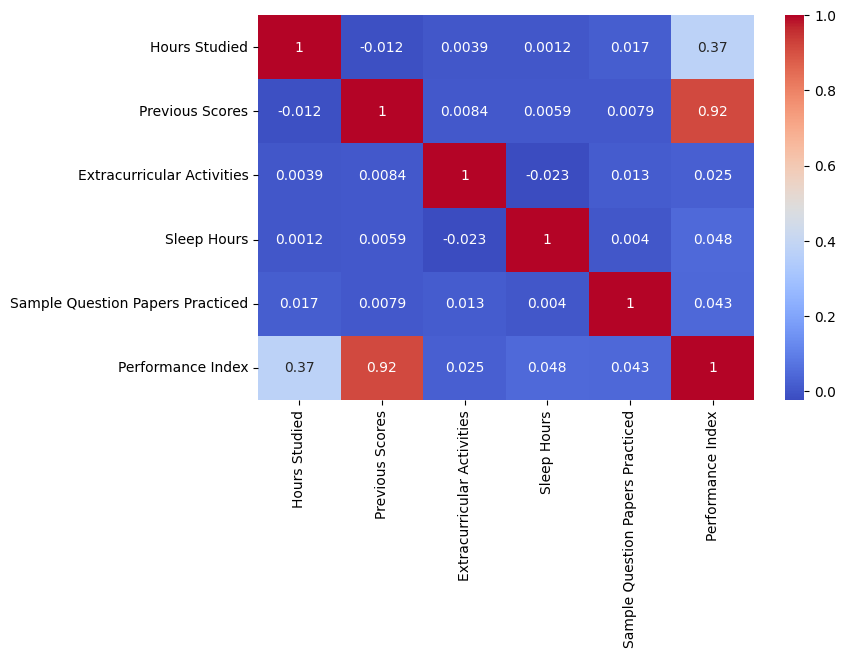

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

### Extracurricular Activities vs Performance Index

Scatter plot to visualize the relationship between extracurricular activities and performance index.

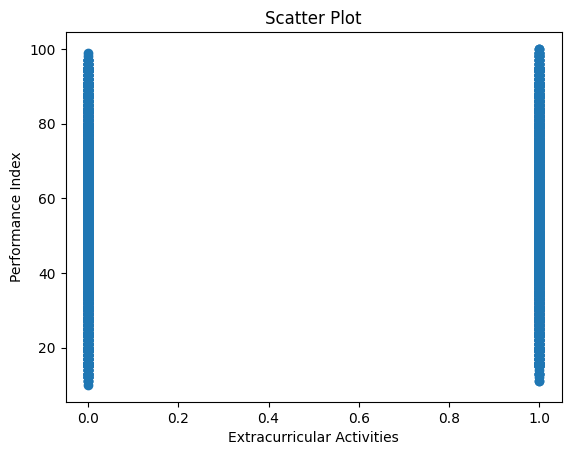

In [50]:
plt.scatter(df["Extracurricular Activities"], df["Performance Index"])
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.title("Scatter Plot")
plt.show()

### Sleep Hours vs Performance Index

Scatter plot to visualize the relationship between sleep hours and performance index.

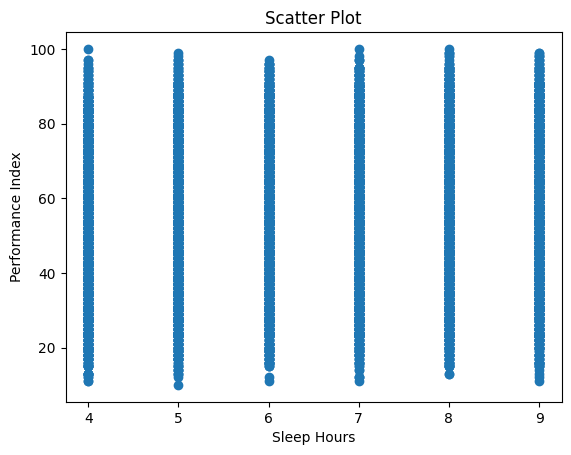

In [51]:
plt.scatter(df["Sleep Hours"], df["Performance Index"])
plt.xlabel("Sleep Hours")
plt.ylabel("Performance Index")
plt.title("Scatter Plot")
plt.show()

### Sample Question Papers Practiced vs Performance Index

Scatter plot to visualize the relationship between sample question papers practiced and performance index.

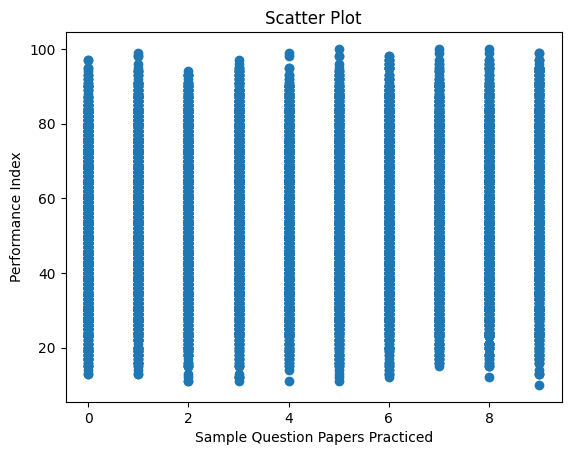

In [52]:
plt.scatter(df["Sample Question Papers Practiced"], df["Performance Index"])
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Performance Index")
plt.title("Scatter Plot")
plt.show()

### Hours Studied vs Performance Index

Scatter plot to visualize the relationship between hours studied and performance index.

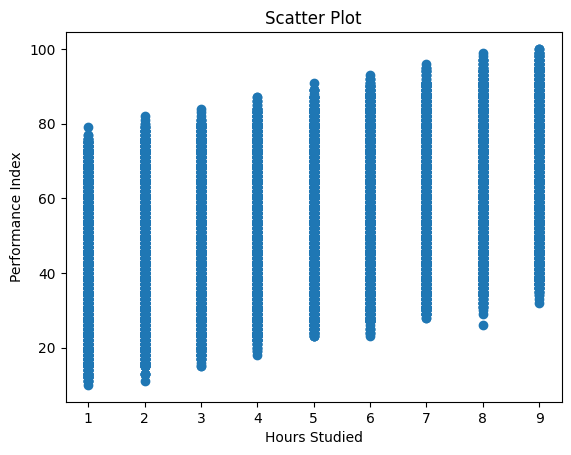

In [53]:
plt.scatter(df["Hours Studied"], df["Performance Index"])
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Scatter Plot")
plt.show()

### Previous Scores vs Performance Index

Scatter plot to visualize the relationship between previous scores and performance index.

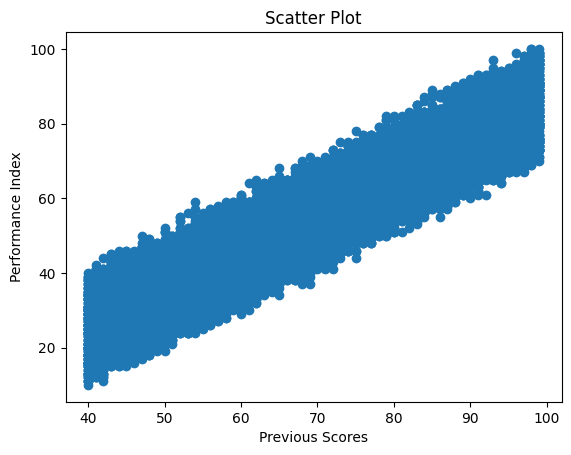

In [54]:
plt.scatter(df["Previous Scores"], df["Performance Index"])
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.title("Scatter Plot")
plt.show()

## Potential Equation

Since only *Hours Studied* and *Previous Scores* are highly correlated to *Performance Index*, we can drop other features.

### Feature Selection

Select the most relevant features based on correlation analysis.

In [55]:
X = df[['Previous Scores', 'Hours Studied']]
y = df['Performance Index']

### Train-Test Split

Split the data into training and testing sets.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Manual Linear Regression Calculation

Calculate the optimal coefficients using the normal equation method.

In [57]:
import numpy as np

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
w_optimal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

print("Optimal Coefficients:", w_optimal)

Optimal Coefficients: [-29.67025989   1.01737155   2.85815458]


### Linear Regression with scikit-learn

Fit a linear regression model using scikit-learn.

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Sklearn coefficients: b0 = {model.intercept_}, b1 = {model.coef_}")

Sklearn coefficients: b0 = -29.670259886759005, b1 = [1.01737155 2.85815458]


### Model Prediction

Predict the performance index for the test set using the trained model.

In [59]:
y_pred = model.predict(X_test)

### Prediction Results

Compare actual and predicted values for the test set.

In [60]:
import pandas as pd
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_pred.head()

,Actual,Predicted
6252,51.0,54.819150
4684,20.0,22.845140
1731,46.0,47.309629
4742,28.0,30.208273
4521,41.0,44.257514


### Model Evaluation

Evaluate the model using mean squared error and R-squared.

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Mean Squared Error: 5.241921186551511
R-squared: 0.985855014245765
Root Mean Squared Error: 2.289524227116086


### Actual vs Predicted Plot

This plot compares the actual and predicted performance index values for the test set.

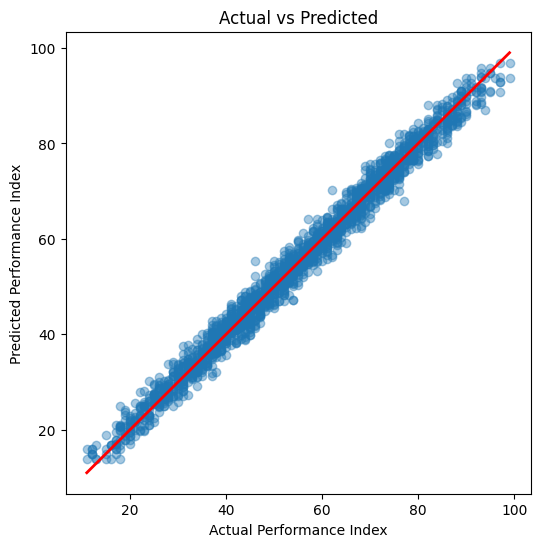

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2,
         color="red")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.show()

### Residual Analysis

Plot the residuals to check for patterns and verify model assumptions.

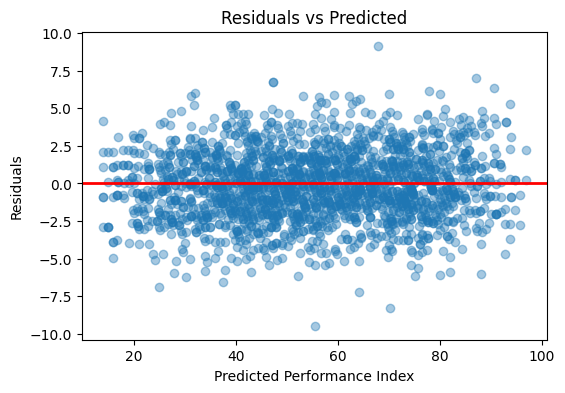

In [63]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, linewidth=2, color="red")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()